# 03写混淆矩阵、精准率、召回率逻辑

In [2]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
#故意使数据偏态
y[digits.target==9] = 1
y[digits.target!=9] = 0


array([0, 0, 0, ..., 0, 1, 0])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.9755555555555555

In [5]:
y_log_predict=log_reg.predict(X_test)

In [7]:
def TN(y_true,y_predict):
        assert len(y_true) == len(y_predict)
        return np.sum((y_true==0)&(y_predict==0))
TN(y_test,y_log_predict)

403

In [8]:
def FP(y_true,y_predict):
        assert len(y_true) == len(y_predict)
        return np.sum((y_true==0)&(y_predict==1))
FP(y_test,y_log_predict)

2

In [9]:
def FN(y_true,y_predict):
        assert len(y_true) == len(y_predict)
        return np.sum((y_true==1)&(y_predict==0))
FN(y_test,y_log_predict)

9

In [12]:
def TP(y_true,y_predict):
        assert len(y_true) == len(y_predict)
        return np.sum((y_true==1)&(y_predict==1))
TP(y_test,y_log_predict)

36

In [13]:
#混淆矩阵
def confusion_matrix(y_true,y_predict):
    return np.array([
        [TN(y_true,y_predict),FP(y_true,y_predict)],
        [FN(y_true,y_predict),TP(y_true,y_predict)]
    ])
confusion_matrix(y_test,y_log_predict)

array([[403,   2],
       [  9,  36]])

In [15]:
def precision_score(y_true,y_predict):
    tp=TP(y_true,y_predict)
    fp=FP(y_true,y_predict)
    try:
        return tp/(tp+fp)
    except:
        return 0.0
precision_score(y_test,y_log_predict)

0.9473684210526315

In [16]:
def recall_score(y_true,y_predict):
    tp=TP(y_true,y_predict)
    fn=FN(y_true,y_predict)
    try:
        return tp/(tp+fn)
    except:
        return 0.0
recall_score(y_test,y_log_predict)

0.8

### sklearn中的混淆矩阵、精准率、召回率


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_log_predict)


array([[403,   2],
       [  9,  36]])

In [18]:
from sklearn.metrics import precision_score
precision_score(y_test,y_log_predict)

0.9473684210526315

In [19]:
from sklearn.metrics import recall_score
recall_score(y_test,y_log_predict)

0.8

# 04F1score

In [26]:
def f1_score(y_true,y_predict):
    def TN(y_true,y_predict):
        assert len(y_true) == len(y_predict)
        return np.sum((y_true==0)&(y_predict==0))
    TN(y_test,y_log_predict)
    
    def FP(y_true,y_predict):
        assert len(y_true) == len(y_predict)
        return np.sum((y_true==0)&(y_predict==1))

    def FN(y_true,y_predict):
        assert len(y_true) == len(y_predict)
        return np.sum((y_true==1)&(y_predict==0))
    
    def precision_score(y_true,y_predict):
        try:
            return TP(y_true,y_predict)/(TP(y_true,y_predict)+FP(y_true,y_predict))
        except:
            return 0.0
        
    def recall_score(y_true,y_predict):
        try:
            return TP(y_true,y_predict)/(TP(y_true,y_predict)+FN(y_true,y_predict))
        except:
            return 0.0
        
    return 2*precision_score(y_true,y_predict)*recall_score(y_true,y_predict)/    \
            (precision_score(y_true,y_predict)+recall_score(y_true,y_predict))

In [27]:
f1_score(y_test,y_log_predict)

0.8674698795180723

In [30]:
from sklearn.metrics import f1_score
f1_score(y_test,y_log_predict)

0.8674698795180723

# 06精准率与召回率trade off

In [31]:
log_reg.decision_function(X_test)[:10]
#X_b*theta

array([-22.05700185, -33.02943631, -16.21335414, -80.37912074,
       -48.25121102, -24.54004847, -44.39161228, -25.0429358 ,
        -0.97827574, -19.71740779])

In [32]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
decision_scores = log_reg.decision_function(X_test)


In [34]:
y_predict_2 = np.array(decision_scores >= 5, dtype='int')
confusion_matrix(y_test,y_predict_2)

array([[404,   1],
       [ 21,  24]])

In [35]:
precision_score(y_test,y_predict_2)

0.96

In [36]:
recall_score(y_test,y_predict_2)

0.5333333333333333

In [38]:
y_predict_3 = np.array(decision_scores >=-5, dtype='int')
confusion_matrix(y_test,y_predict_3)

array([[390,  15],
       [  5,  40]])

In [39]:
precision_score(y_test,y_predict_3)

0.7272727272727273

In [40]:
recall_score(y_test,y_predict_3)

0.8888888888888888

#精准率与召回率之间存在trade off点


# 06精准率和召回率曲线

In [60]:
from sklearn import datasets
import matplotlib.pyplot as plt
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores=log_reg.decision_function(X_test)
decision_scores[50:60]


array([  1.49550696,   8.32079223, -36.29312173, -42.50734809,
       -25.9045751 , -34.98959067,  -8.42011892, -50.04720364,
       -51.48209621,  19.88960689])

In [51]:
y_predict=log_reg.predict(X_test)
y_predict[50:60]
#decision_scores的含义

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

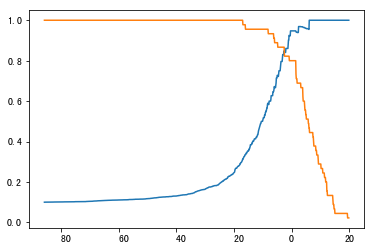

In [63]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision=[]
recall=[]
thresholds=np.arange(np.min(decision_scores),np.max(decision_scores),0.1)
for threshold in thresholds:
    y_predict=np.array(decision_scores>=threshold,dtype='int')
    precision.append(precision_score(y_test,y_predict))
    recall.append(recall_score(y_test,y_predict))
plt.plot(thresholds,precision)   
plt.plot(thresholds,recall)   
#可用于判断想要哪个程度的精确率和召回率

### precision_recall曲线

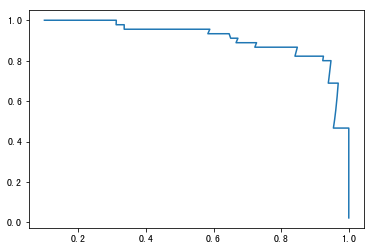

In [64]:
plt.plot(precision,recall)
#曲线急剧下降的开始点极有可能是阈值设置点

In [65]:
#sklearn中的PR曲线
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_test,decision_scores)

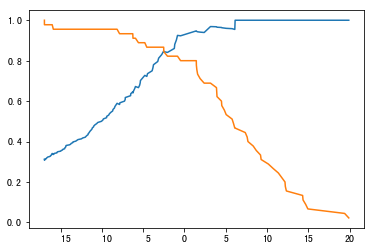

In [68]:
plt.plot(thresholds,precisions[:-1])   
plt.plot(thresholds,recalls[:-1])  
#函数会自己选择最合适的图像区间

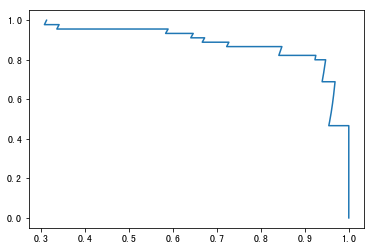

In [69]:
plt.plot(precisions,recalls)

# 07ROC曲线（receiver operation characteristic curve）

In [73]:

def FPR(y_test,y_predict):
    fp=FP(y_test,y_predict)
    tn=TN(y_test,y_predict)
    try:
        return fp/(fp+tn)
    except:
        return 0.0
def TPR(y_test,y_predict):
    tp=TP(y_test,y_predict)
    fn=FN(y_test,y_predict)
    try:
        return tp/(tp+fn)
    except:
        return 0.0


In [74]:
fprs=[]
tprs=[]
thresholds=np.arange(np.min(decision_scores),np.max(decision_scores),0.1)
for threshold in thresholds:
    y_predict=np.array(decision_scores>=threshold,dtype='int')
    fprs.append(FPR(y_test,y_predict))
    tprs.append(TPR(y_test,y_predict))

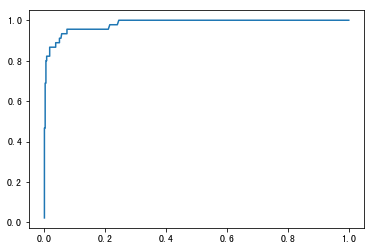

In [75]:
plt.plot(fprs,tprs)

### sklearn中的ROC


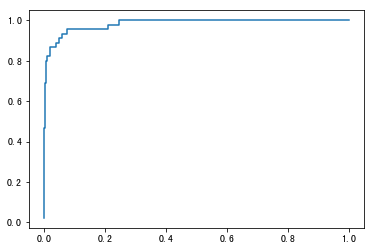

In [78]:
from sklearn.metrics import roc_curve
#先用decision_scores计算threshold和predict，后算fprs,tprs
fprs,tprs,thresholds=roc_curve(y_test,decision_scores)
plt.plot(fprs,tprs)

In [79]:
#roc曲线的下方面积对比可看出模型优劣
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,decision_scores)

0.9830452674897119

# 08Confusion-Matrix-in-Multiclass-Classification

In [80]:
#多特征模型的评价指标

from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=666)

In [81]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.93115438108484

In [84]:
from sklearn.metrics import precision_score
y_predict=log_reg.predict(X_test)
precision_score(y_test,y_predict,average='micro')
#精确率默认值不能处理多特征，需要调参数average

0.93115438108484

In [85]:
#混淆矩阵，用于看哪些数据预测出错率高
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)
#对角线上为真值和预测一样

array([[147,   0,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0, 123,   1,   2,   0,   0,   0,   3,   4,  10],
       [  0,   0, 134,   1,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 138,   0,   5,   0,   1,   5,   0],
       [  2,   5,   0,   0, 139,   0,   0,   3,   0,   1],
       [  1,   3,   1,   0,   0, 146,   0,   0,   1,   0],
       [  0,   2,   0,   0,   0,   1, 131,   0,   2,   0],
       [  0,   0,   0,   1,   0,   0,   0, 132,   1,   2],
       [  1,   9,   2,   3,   2,   4,   0,   0, 115,   4],
       [  0,   1,   0,   5,   0,   3,   0,   2,   2, 134]])

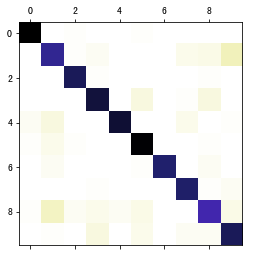

In [92]:
#可视化
cfm=confusion_matrix(y_test,y_predict)
plt.matshow(cfm,cmap=plt.cm.CMRmap_r)   #矩阵可视化，mat
#真值为1，预测成了9；真值为8，预测成了1